In [749]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame
from APIkey import APIkey, APIpw
import json
import csv
import matplotlib.pyplot as plt
import numpy as np

In [750]:
#Webscrape https://www.rebellegirls.com/yarnfiber.htm for list of offered brands
url= "https://www.rebellegirls.com/yarnfiber.htm"
page= requests.get(url)

soup=BeautifulSoup(page.content, "html.parser")
results=soup.find(id="accordion")
   
#used ChatGPT to figure out this block of webscraping code
stock=[]
name=[]
brands = soup.find_all('h3')
for brand in brands:
    brand_name = brand.text.strip()
    yarn_list = brand.find_next('div').find_all('li')
    for yarn in yarn_list:
        yarn_name = yarn.text.strip()
        name.append(yarn_name)
        stock.append(brand_name)


In [751]:
#create dataframe of Local Yarn Shop (LYS) offerings
stock_list={"stock":stock, "name":name}
rebelle=pd.DataFrame(stock_list)

rebelle['Rebelle Stock']=rebelle['stock']+ ' '+ rebelle['name']

rebelle=rebelle.drop(['stock', 'name'], axis=1)
rebelle




,Rebelle Stock
0,Adriafil Knitcol
1,Anzula Breeze
2,Anzula Cloud
3,Anzula Haiku
4,Anzula Lunaris
...,...
125,Add-Ins Firestar
126,Add-Ins Angelina
127,Add-Ins Soffsilk
128,Add-Ins Silk Cocoons


In [752]:
#used this line of code to create "backup" of Rebelle stock list, in case website is not loading correctly
#Not needed to run project

#rebelle.to_csv('rebelle_webscrape.csv', mode='a', index= False, header= True)

In [753]:
rebelle=pd.read_csv('rebelle_webscrape.csv')
rebelle

,Rebelle Stock
0,Adriafil Knitcol
1,Anzula Breeze
2,Anzula Cloud
3,Anzula Haiku
4,Anzula Lunaris
...,...
125,Add-Ins Firestar
126,Add-Ins Angelina
127,Add-Ins Soffsilk
128,Add-Ins Silk Cocoons


In [754]:
def clean(rebelle) -> pd.DataFrame:
    rebelle.columns= rebelle.columns.str.title()
    rebelle.columns= rebelle.columns.str.strip()

    return rebelle

rebelle['Rebelle Stock']=rebelle['Rebelle Stock'].str.replace('Dominon', 'Dominion')
rebelle['Rebelle Stock']=rebelle['Rebelle Stock'].str.replace('2-ply','2 ply')

rebelle_list= clean(rebelle)
rebelle_list=rebelle.drop_duplicates()

rebelle_list.iloc[81:126]


,Rebelle Stock
82,Noro Silk Garden Solo
83,Ozark Handspun Ozark Handspun
84,Plymouth Yarns Arequipa Fur
85,Plymouth Yarns Equinox
86,Plymouth Yarns Happy Feet
87,Plymouth Yarns Homestead
88,Plymouth Yarns Incan Spice
89,Plymouth Yarns Linaza
90,Plymouth Yarns Nettle Grove
91,Plymouth Yarns Solstice


In [755]:
#Code I used to create the ravelry_api.csv file
#Future project is to figure out how to turn this into a FOR LOOP, 
#but couldn't logic it currently and didn't want to waste more time not moving forward on project
#Had to change yarn name in both url and yarn variable, Note for future self:Be sure to CLEAR ALL OUTPUTS after each yarn

#import requests
#import pandas as pd
#import json
#import csv
#Call the API
url = 'https://api.ravelry.com/patterns/search.json?yarn=Malabrigo+Worsted'


response=requests.get(url, auth= (APIkey, APIpw))

response.status_code
#Get the response from API
rav_things=response.json()
patterns= rav_things.get('patterns')
fiber= pd.DataFrame(response.json()['patterns'])

fiber['yarn']= 'Malabrigo Worsted'
#Write it to the file
#fiber.to_csv('ravelry_api.csv', mode='a', index= False, header= False)

fiber.shape

(100, 10)

In [756]:
#read in the csv file created from Ravelry API calls
#(data is currently only first page of API results, default is <=100 results)
projects=pd.read_csv('ravelry_api.csv')

In [757]:
#Label each column and see what kind of data we're working with
projects.columns=['free', 'id', 'name', 'permalink', 'personal_attributes', 'first_photo',
       'designer', 'pattern_author', 'pattern_sources', 'yarn']

projects.head

<bound method NDFrame.head of        free      id                          name  \
0     False  706936               Puff Stitch Hat   
1      True  650697          Toe-Up Worsted Socks   
2      True   93685     Child's Self-striping Hat   
3      True  545271              Best Baby Beanie   
4      True  317207     F193 Baby / Toddler Socks   
...     ...     ...                           ...   
6029  False  639820                  Opulent Cowl   
6030   True   57603                    Clutch Bag   
6031  False   95547  Almost Fibonacci-esque Scarf   
6032   True  104890                        Rocker   
6033   True  204738          Ozark Opulent Kimono   

                         permalink  personal_attributes  \
0                puff-stitch-hat-9                  NaN   
1             toe-up-worsted-socks                  NaN   
2         childs-self-striping-hat                  NaN   
3                 best-baby-beanie                  NaN   
4        f193-baby---toddler-socks    

In [758]:
#Change this column into a string and then expand each key:value pair into own column
projects['pattern_author']= projects['pattern_author'].astype('str')

new = projects["pattern_author"].str.split(",", n=5, expand=True)


#add desired column back to original df
projects['author']= new[4]


In [759]:
def clean(projects) -> pd.DataFrame:
    projects.columns= projects.columns.str.title()
    projects.columns= projects.columns.str.strip()

    return projects

projects= clean(projects)

In [760]:
#tidying up columns 
projects['Author']=projects['Author'].astype('str')
projects['Author']=projects['Author'].str.strip("'name': '")

projects['Free']=projects['Free'].astype('str')
projects['Free']=projects['Free'].str.replace('False', 'No')
projects['Free']=projects['Free'].str.replace('True', 'Yes')

projects.head(2)

,Free,Id,Name,Permalink,Personal_Attributes,First_Photo,Designer,Pattern_Author,Pattern_Sources,Yarn,Author
0,No,706936,Puff Stitch Hat,puff-stitch-hat-9,NaN,"{'id': 118330077, 'sort_order': 1, 'user_id': ...","{'crochet_pattern_count': 0, 'favorites_count'...","{'crochet_pattern_count': 0, 'favorites_count'...","[{'amazon_rating': None, 'amazon_reviews': Non...",Adriafil Knitcol,Deborah Kah
1,Yes,650697,Toe-Up Worsted Socks,toe-up-worsted-socks,NaN,"{'id': 56297703, 'sort_order': 1, 'user_id': 1...","{'crochet_pattern_count': 0, 'favorites_count'...","{'crochet_pattern_count': 0, 'favorites_count'...","[{'amazon_rating': None, 'amazon_reviews': Non...",Adriafil Knitcol,Colette Retrosi


In [761]:
#drop unwanted columns
projects=projects.drop(['Permalink','Personal_Attributes', 'First_Photo', 'Designer','Pattern_Author', 'Pattern_Sources'], axis=1)

In [762]:
#joined the two datasets together
rebelle_projects= (pd.merge(rebelle_list, projects, left_on= "Rebelle Stock", right_on= "Yarn"))

rebelle_projects.head(2)
rebelle_projects.tail(2)

,Rebelle Stock,Free,Id,Name,Yarn,Author
5704,Ozark Handspun Ozark Handspun,Yes,104890,Rocker,Ozark Handspun Ozark Handspun,David Gentzsch
5705,Ozark Handspun Ozark Handspun,Yes,204738,Ozark Opulent Kimono,Ozark Handspun Ozark Handspun,Ozark Handspu


In [763]:
print(rebelle_projects.isnull().any().any())

False


In [764]:
rebelle_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5706 entries, 0 to 5705
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rebelle Stock  5706 non-null   object
 1   Free           5706 non-null   object
 2   Id             5706 non-null   int64 
 3   Name           5706 non-null   object
 4   Yarn           5706 non-null   object
 5   Author         5706 non-null   object
dtypes: int64(1), object(5)
memory usage: 267.6+ KB


In [765]:
difference= rebelle[~rebelle['Rebelle Stock'].isin(rebelle_projects['Yarn'])]
print(difference)

                                         Rebelle Stock
8         Artistic Yarn by Abi Self Striping Sock Yarn
18                                        Cascade Eco+
23                                  Cascade Lana d'Oro
29                           Cestari Traditional 2 ply
30                                Collinette Jitterbug
31                             Elsbeth Lavold Hempathy
32                        Feederbrook Farms Entropy DK
46                           Knit Collage Sampler Kits
50                Knitted Wit Sassy Holidays Sock Club
54                                       Mad Tosh ASAP
73                                      Malabrigo Sock
75                                   Malabrigo Worsted
84                         Plymouth Yarns Arequipa Fur
85                              Plymouth Yarns Equinox
86                           Plymouth Yarns Happy Feet
87                            Plymouth Yarns Homestead
88                          Plymouth Yarns Incan Spice
89        

In [766]:
rebelle_projects["Name"].value_counts()

Name
Violet Waffles               6
Kamani                       4
Marlow Sweater               4
Nuptse                       4
Inside Cat                   4
                            ..
Bennington Blanket Square    1
Gothica                      1
The Adelaide Scarf           1
Side Line Scarf              1
Ozark Opulent Kimono         1
Name: count, Length: 5185, dtype: int64

In [767]:
rebelle_projects[rebelle_projects['Name']=='Violet Waffles']

,Rebelle Stock,Free,Id,Name,Yarn,Author
1061,Cascade 220,No,444481,Violet Waffles,Cascade 220,Halldora J
3420,Mad Tosh Prairie,No,444481,Violet Waffles,Mad Tosh Prairie,Halldora J
3731,Mad Tosh Vintage,No,444481,Violet Waffles,Mad Tosh Vintage,Halldora J
3826,Malabrigo Arroyo,No,444481,Violet Waffles,Malabrigo Arroyo,Halldora J
4735,Malabrigo Rastita,No,444481,Violet Waffles,Malabrigo Rastita,Halldora J
4918,Malabrigo Rios,No,444481,Violet Waffles,Malabrigo Rios,Halldora J


In [768]:
rebelle_projects["Author"].value_counts()

Author
Susan Ashcroft     73
Taiga Hilliard     65
Cheryl Kubat       43
Louisa Harding     36
Amy Small          34
                   ..
Sylvia Leak         1
Amanda Barry        1
Sarah Peasley       1
Audrey Kerchner     1
Ozark Handspu       1
Name: count, Length: 2376, dtype: int64

In [769]:
rebelle_projects[rebelle_projects["Author"]=="Susan Ashcroft"]

,Rebelle Stock,Free,Id,Name,Yarn,Author
2177,Feederbrook Farms Entropy Sport,No,7407702,Murano Squares bandana,Feederbrook Farms Entropy Sport,Susan Ashcroft
2296,The Fiber Co. Arranmore,No,994417,Stashdance cardigan,The Fiber Co. Arranmore,Susan Ashcroft
3327,Louisa Harding Amitola,No,512615,Radiant Gradient Boomerang,Louisa Harding Amitola,Susan Ashcroft
3332,Louisa Harding Amitola,No,587825,Radiant Gradient Bias Scarf,Louisa Harding Amitola,Susan Ashcroft
3335,Louisa Harding Amitola,No,676480,Fastoche Hat,Louisa Harding Amitola,Susan Ashcroft
...,...,...,...,...,...,...
5377,Noro Silk Garden Sock,Yes,213672,Zig zag scarf (3 ways),Noro Silk Garden Sock,Susan Ashcroft
5385,Noro Silk Garden Sock,No,424461,Big Waffle (boomerang),Noro Silk Garden Sock,Susan Ashcroft
5519,Noro Silk Garden Sock Solo,No,1153037,CC #5: Side to side,Noro Silk Garden Sock Solo,Susan Ashcroft
5522,Noro Silk Garden Sock Solo,No,1172457,CC #7: Intertwined Cables,Noro Silk Garden Sock Solo,Susan Ashcroft


In [770]:
free_count= rebelle_projects["Free"].value_counts()
free_count

Free
No     4513
Yes    1193
Name: count, dtype: int64

In [771]:
free_patterns= rebelle_projects[rebelle_projects['Free']== 'Yes']
paid_patterns= rebelle_projects[rebelle_projects['Free']== 'No']

free_patterns

,Rebelle Stock,Free,Id,Name,Yarn,Author
1,Adriafil Knitcol,Yes,650697,Toe-Up Worsted Socks,Adriafil Knitcol,Colette Retrosi
2,Adriafil Knitcol,Yes,93685,Child's Self-striping Hat,Adriafil Knitcol,Janet D. Russell
3,Adriafil Knitcol,Yes,545271,Best Baby Beanie,Adriafil Knitcol,Danielle Meyer
4,Adriafil Knitcol,Yes,317207,F193 Baby / Toddler Socks,Adriafil Knitcol,JoAnne Turcott
5,Adriafil Knitcol,Yes,692550,Zippy,Adriafil Knitcol,Marji LaFrenier
...,...,...,...,...,...,...
5695,Ozark Handspun Ozark Handspun,Yes,519601,Quatrefoil Eyelet Armwarmers,Ozark Handspun Ozark Handspun,Sarah E. Whit
5698,Ozark Handspun Ozark Handspun,Yes,553561,Glitter and Fizz,Ozark Handspun Ozark Handspun,Sunni Scrivner
5702,Ozark Handspun Ozark Handspun,Yes,57603,Clutch Bag,Ozark Handspun Ozark Handspun,Margie Fish
5704,Ozark Handspun Ozark Handspun,Yes,104890,Rocker,Ozark Handspun Ozark Handspun,David Gentzsch


In [772]:
paid_yarn=pd.DataFrame(paid_patterns['Rebelle Stock'].value_counts())
paid_yarn
free_yarn= pd.DataFrame(free_patterns['Rebelle Stock'].value_counts())

print(free_yarn)

                                count
Rebelle Stock                        
Cascade Pacific                    57
Noro Kureyon                       52
Koigu KPPPM                        46
Cascade 128 Superwash              44
Blue Sky Fibers Worsted Cotton     39
...                               ...
Anzula Nebula                       3
Noro Silk Garden Sock Solo          2
Knitted Wit Victory Fingering       1
Anzula Wash My Lace                 1
Juniper Moon Zooey DK               1

[66 rows x 1 columns]


In [773]:
yarn_sorted=free_yarn.merge(paid_yarn, on='Rebelle Stock', how= 'outer')
yarn_sorted['count_x']=yarn_sorted['count_x'].fillna(0)
yarn_sorted['count_y']=yarn_sorted['count_y'].fillna(0)

yarn_sorted['count_x']=yarn_sorted['count_x'].astype(int)
yarn_sorted.columns=['Yes', 'No']
yarn_sorted.head(10)

,Yes,No
Rebelle Stock,,
Adriafil Knitcol,39,60
Anzula Breeze,4,47
Anzula Cloud,6,91
Anzula Haiku,8,31
Anzula Lunaris,0,25
Anzula Nebula,3,77
Anzula Squishy,13,87
Anzula Wash My Lace,1,16
Blue Sky Fibers Alpaca Silk,15,85


<Axes: title={'center': 'Is the Pattern available for Free?'}, ylabel='count'>

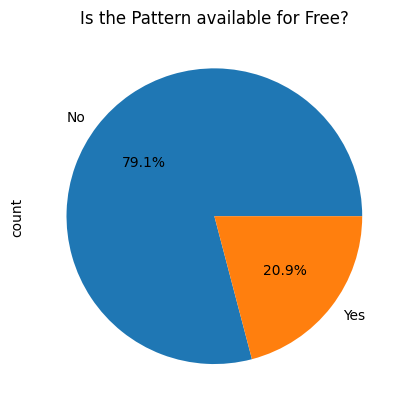

In [774]:
plt.title('Is the Pattern available for Free?')

free_count.plot(kind='pie', autopct= '%1.1f%%')


Text(0.5, 1.0, 'Is the Pattern Available for Free, sorted by Yarn')

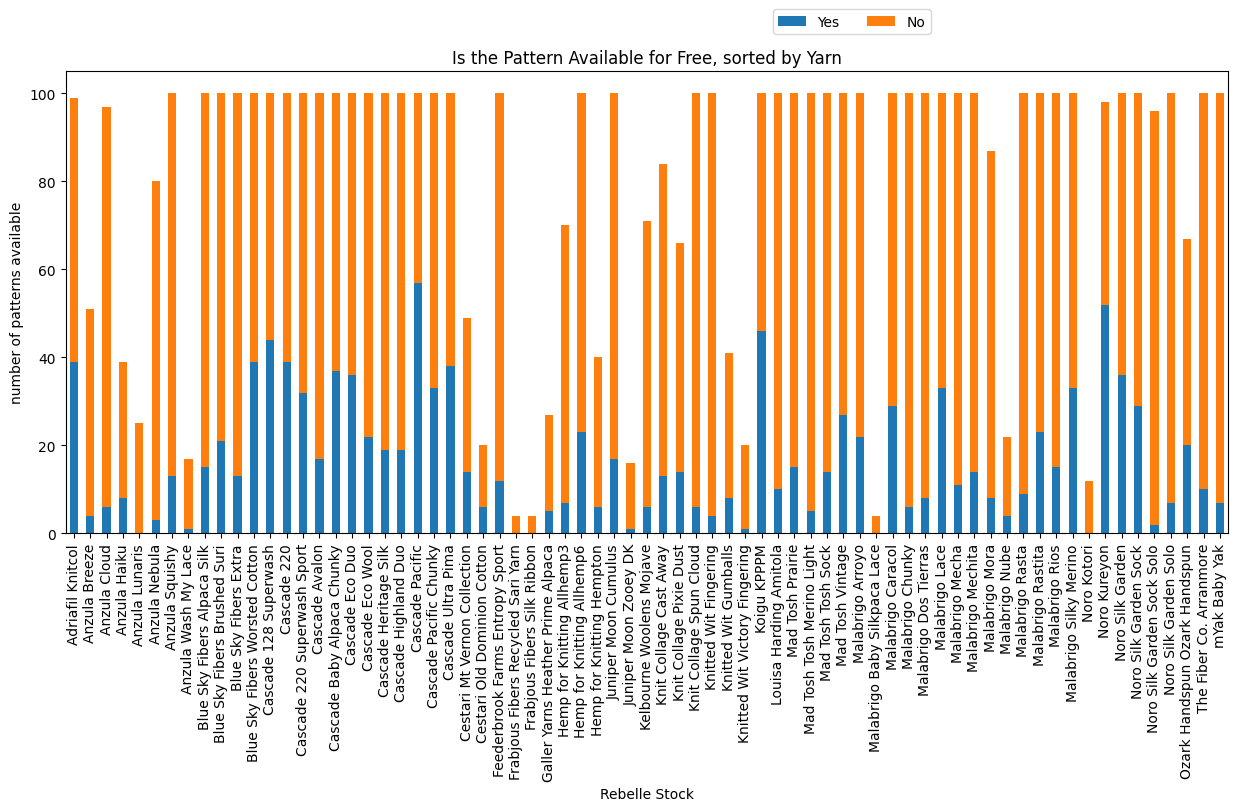

In [775]:
yarn_sorted.plot(kind='bar', stacked=True, figsize=(15,6)).set(ylabel='number of patterns available')
plt.legend(bbox_to_anchor=(0.75, 1.15), ncol=2)
plt.title('Is the Pattern Available for Free, sorted by Yarn')